In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.dropna(subset=['price'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


<Axes: >

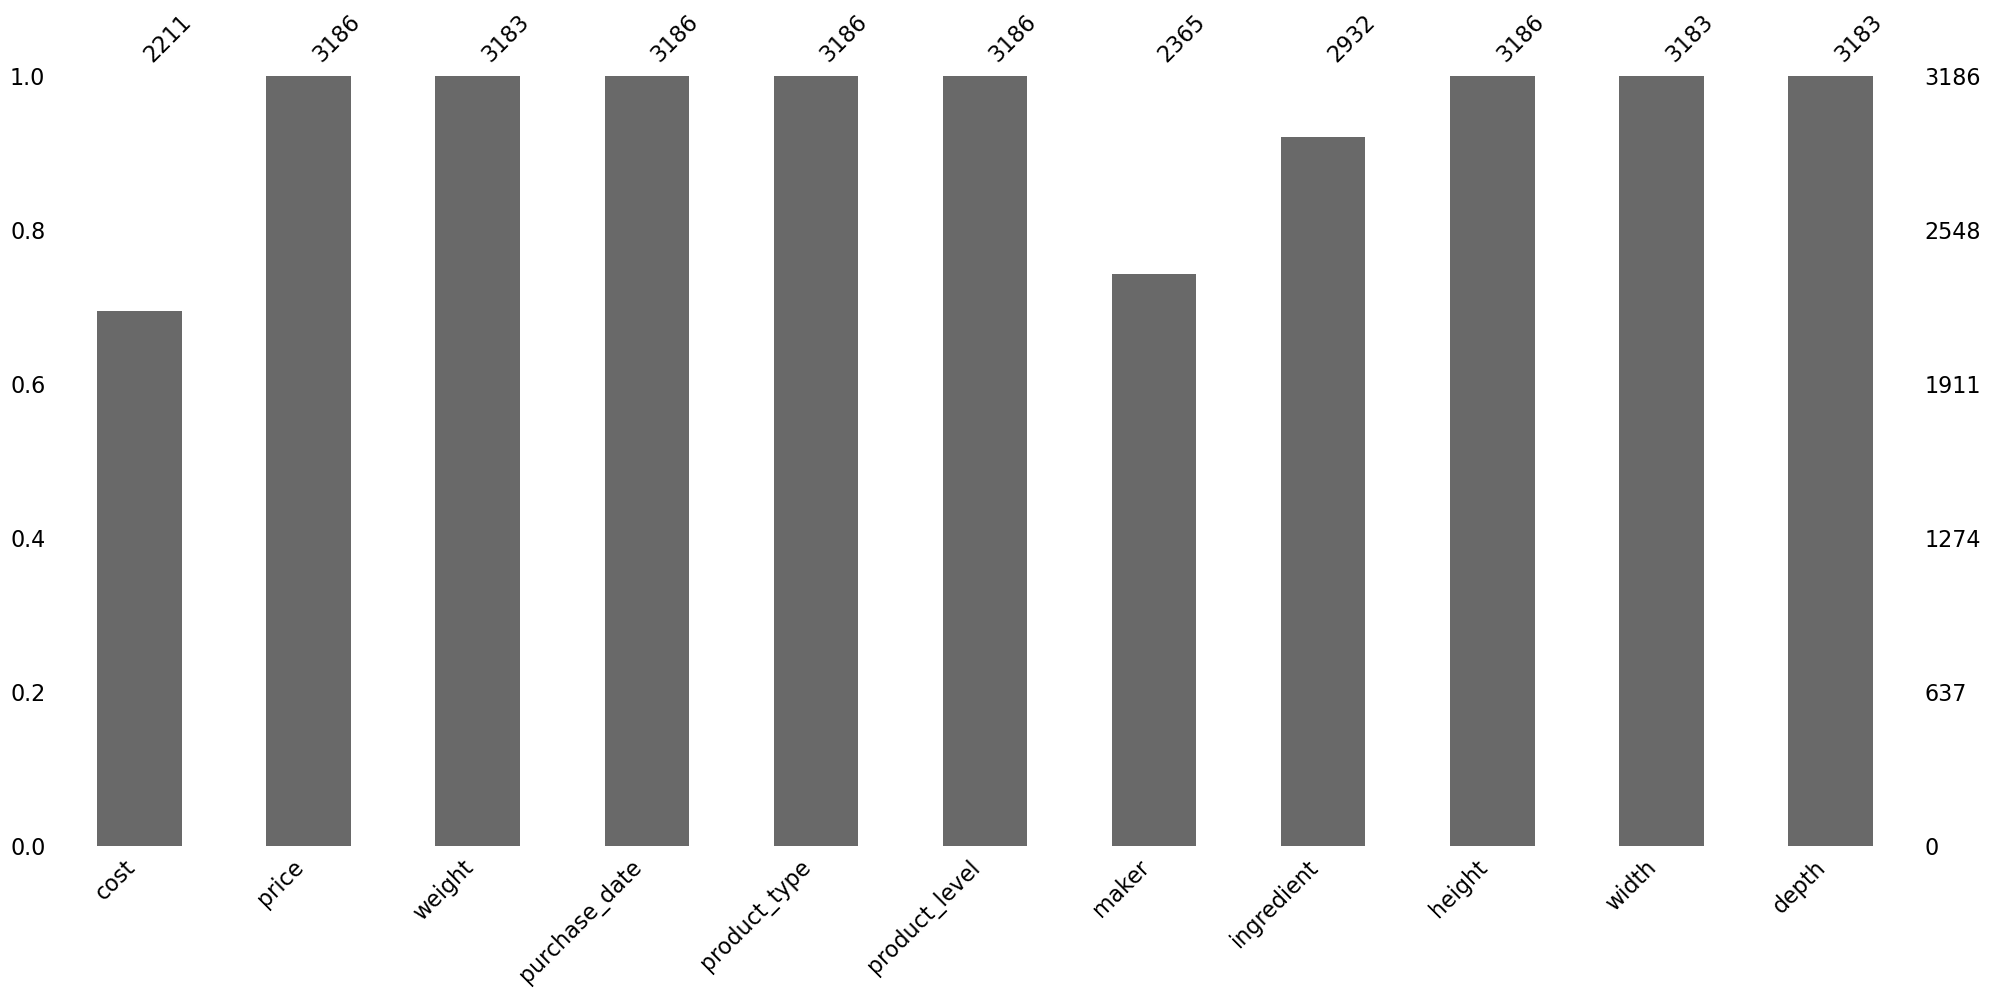

In [4]:
msno.bar(df)

In [5]:
features = list(df.columns)
target = 'price'
features.remove(target)

X = df[features]
y = df[target].str.strip("$").str.replace(",","").astype(float)

In [6]:
from sklearn.preprocessing import LabelEncoder
class Mean_Data_Transformer(object):
    
    def fit(self, X, y=None):
        self.mean_cost = 1000*X["cost"].str.strip("$").str.strip("k").astype(float).mean() # obtain mean cost
        self.mean_weight = X["weight"].map(self.weight2num).mean() # obtain mean weight
        self.majority_month = pd.to_datetime(X["purchase_date"]).dt.month.mode()[0] # obtain majority purchase month
        self.majority_weekday = pd.to_datetime(X["purchase_date"]).dt.weekday.mode()[0] # obtain majority purchase weekday
        self.mean_ingredient_number = X["ingredient"].map(self.get_numbers).mean() # obtain mean ingredient number
        self.pl_le = LabelEncoder() # create label-encoder
        self.majority_product_level = pd.Series(self.pl_le.fit_transform(X["product_level"])).mode()[0] # obtain majority product level code
        self.pt_le = LabelEncoder() # create label-encoder
        self.majority_product_type = pd.Series(self.pt_le.fit_transform(X["product_type"])).mode()[0] # obtain majority product type code
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Cost"] = 1000*X["cost"].str.strip("$").str.strip("k").astype(float) # convert cost to numerical value
        new_df["Cost"].fillna(self.mean_cost,inplace=True) # fill in missing cost with mean cost
        new_df["Weight"] = X["weight"].map(self.weight2num) # convert weight to numerical value
        new_df["Weight"].fillna(self.mean_weight,inplace=True) # fill in missing weight with mean weight
        new_df["Month"] = pd.to_datetime(X["purchase_date"]).dt.month # convert purchase date to purchase month
        new_df["Month"].fillna(self.majority_month,inplace=True) # fill in missing purchase month with majority purchase month
        new_df["Weekday"] = pd.to_datetime(X["purchase_date"]).dt.weekday # convert purchase date to purchase weekday
        new_df["Weekday"].fillna(self.majority_weekday,inplace=True) # fill in missing purchase weekday with majority purchase weekday
        new_df['Ingredient Number'] = X["ingredient"].map(self.get_numbers) # obtain number of ingredients in recipe
        new_df['Ingredient Number'].fillna(self.mean_ingredient_number,inplace=True) # fill in missing ingredient number with mean ingredient number
        new_df["Product Level"] = self.pl_le.transform(X["product_level"]) # transform product level with label-encoder
        new_df["Product Level"].fillna(self.majority_product_level,inplace=True) # fill in missing product level with majority product level code
        new_df["Product Type"] = self.pt_le.transform(X["product_type"]) # transform product type with label-encoder
        new_df["Product Type"].fillna(self.majority_product_type,inplace=True) # fill in missing product type with majority product type code
        return new_df # return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
    def weight2num(self, x): # function to convert weight to number
        if type(x) == str:
            x = x.strip('Kg').split(' Ton ')
            return float(x[0])*1000+float(x[1])
        else:
            return x
        
    def get_numbers(self, x): # function to get number of ingredients in recipe
        if type(x) == str:
            return len(x.split(','))
        else:
            return x

In [7]:
from sklearn.preprocessing import LabelEncoder
class Median_Data_Transformer(object):
    
    def fit(self, X, y=None):
        self.median_cost = 1000*X["cost"].str.strip("$").str.strip("k").astype(float).median() # obtain median cost
        self.median_weight = X["weight"].map(self.weight2num).median() # obtain median weight
        self.majority_month = pd.to_datetime(X["purchase_date"]).dt.month.mode()[0] # obtain majority purchase month
        self.majority_weekday = pd.to_datetime(X["purchase_date"]).dt.weekday.mode()[0] # obtain majority purchase weekday
        self.median_ingredient_number = X["ingredient"].map(self.get_numbers).median() # obtain median ingredient number
        self.pl_le = LabelEncoder() # create label-encoder
        self.majority_product_level = pd.Series(self.pl_le.fit_transform(X["product_level"])).mode()[0] # obtain majority product level code
        self.pt_le = LabelEncoder() # create label-encoder
        self.majority_product_type = pd.Series(self.pt_le.fit_transform(X["product_type"])).mode()[0] # obtain majority product type code
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Cost"] = 1000*X["cost"].str.strip("$").str.strip("k").astype(float) # convert cost to numerical value
        new_df["Cost"].fillna(self.median_cost,inplace=True) # fill in missing cost with median cost
        new_df["Weight"] = X["weight"].map(self.weight2num) # convert weight to numerical value
        new_df["Weight"].fillna(self.median_weight,inplace=True) # fill in missing weight with median weight
        new_df["Month"] = pd.to_datetime(X["purchase_date"]).dt.month # convert purchase date to purchase month
        new_df["Month"].fillna(self.majority_month,inplace=True) # fill in missing purchase month with majority purchase month
        new_df["Weekday"] = pd.to_datetime(X["purchase_date"]).dt.weekday # convert purchase date to purchase weekday
        new_df["Weekday"].fillna(self.majority_weekday,inplace=True) # fill in missing purchase weekday with majority purchase weekday
        new_df['Ingredient Number'] = X["ingredient"].map(self.get_numbers) # obtain number of ingredients in recipe
        new_df['Ingredient Number'].fillna(self.median_ingredient_number,inplace=True) # fill in missing ingredient number with median ingredient number
        new_df["Product Level"] = self.pl_le.transform(X["product_level"]) # transform product level with label-encoder
        new_df["Product Level"].fillna(self.majority_product_level,inplace=True) # fill in missing product level with majority product level code
        new_df["Product Type"] = self.pt_le.transform(X["product_type"]) # transform product type with label-encoder
        new_df["Product Type"].fillna(self.majority_product_type,inplace=True) # fill in missing product type with majority product type code
        return new_df # return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
    def weight2num(self, x): # function to convert weight to number
        if type(x) == str:
            x = x.strip('Kg').split(' Ton ')
            return float(x[0])*1000+float(x[1])
        else:
            return x
        
    def get_numbers(self, x): # function to get number of ingredients in recipe
        if type(x) == str:
            return len(x.split(','))
        else:
            return x

In [8]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
class XGBoost_Data_Transformer(object):
    
    def fit(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Weight"] = X["weight"].map(self.weight2num) # convert weight to numerical value
        self.mean_weight = new_df["Weight"].mean() # obtain mean weight
        new_df["Weight"].fillna(self.mean_weight,inplace=True) # fill in missing weight with mean weight
        new_df["Month"] = pd.to_datetime(X["purchase_date"]).dt.month # convert purchase date to purchase weekday
        self.majority_month = new_df["Month"].mode()[0] # obtain majority purchase month
        new_df["Month"].fillna(self.majority_month,inplace=True) # fill in missing purchase month with majority purchase month
        new_df["Weekday"] = pd.to_datetime(X["purchase_date"]).dt.weekday # convert purchase date to purchase weekday
        self.majority_weekday = new_df["Weekday"].mode()[0] # obtain majority purchase weekday
        new_df["Weekday"].fillna(self.majority_weekday,inplace=True) # fill in missing purchase weekday with majority purchase weekday
        new_df["Ingredient Number"] = X["ingredient"].map(self.get_numbers) # obtain number of ingredients in recipe
        self.mean_ingredient_number = new_df["Ingredient Number"].mean() # obtain mean ingredient number
        new_df['Ingredient Number'].fillna(self.mean_ingredient_number,inplace=True) # fill in missing ingredient number with median ingredient number
        self.pl_le = LabelEncoder() # create label-encoder
        new_df["Product Level"] = pd.Series(self.pl_le.fit_transform(X["product_level"])) # fit and transform product level with label-encoder
        self.majority_product_level = new_df["Product Level"].mode()[0] # obtain majority product level code
        new_df["Product Level"].fillna(self.majority_product_level,inplace=True) # fill in missing product level with majority product level code
        self.pt_le = LabelEncoder() # create label-encoder
        new_df["Product Type"] = pd.Series(self.pt_le.fit_transform(X["product_type"])) # fit and transform product type with label-encoder
        self.majority_product_type = new_df["Product Type"].mode()[0] # obtain majority product type code
        new_df["Product Type"].fillna(self.majority_product_type,inplace=True) # fill in missing product type with majority product type code
        new_df["Cost"] = X["cost"].str.strip("$").str.strip("k").astype(float)*1000 # convert cost to numerical value
        self.cost_imputer = XGBRegressor() # create a XGBoost imputer for cost
        df_for_imputing_cost = new_df.dropna() # create training data for cost imputer by dropping missing data
        self.cost_imputer.fit(df_for_imputing_cost[["Weight","Month","Weekday","Ingredient Number","Product Level","Product Type"]], df_for_imputing_cost["Cost"]) # fit cost imputer
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Weight"] = X["weight"].map(self.weight2num) # convert weight to numerical value
        new_df["Weight"].fillna(self.mean_weight,inplace=True) # fill in missing weight with mean weight
        new_df["Month"] = pd.to_datetime(X["purchase_date"]).dt.month # convert purchase date to purchase month
        new_df["Month"].fillna(self.majority_month,inplace=True) # fill in missing purchase month with majority purchase month
        new_df["Weekday"] = pd.to_datetime(X["purchase_date"]).dt.weekday # convert purchase date to purchase weekday
        new_df["Weekday"].fillna(self.majority_weekday,inplace=True) # fill in missing purchase weekday with majority purchase weekday
        new_df['Ingredient Number'] = X["ingredient"].map(self.get_numbers) # obtain number of ingredients in recipe
        new_df['Ingredient Number'].fillna(self.mean_ingredient_number,inplace=True) # fill in missing ingredient number with mean ingredient number
        new_df["Product Level"] = self.pl_le.transform(X["product_level"]) # transform product level with label-encoder
        new_df["Product Level"].fillna(self.majority_product_level,inplace=True) # fill in missing product level with majority product level code
        new_df["Product Type"] = self.pt_le.transform(X["product_type"]) # transform product type with label-encoder
        new_df["Product Type"].fillna(self.majority_product_type,inplace=True) # fill in missing product type with majority product type code
        new_df["Cost"] = X["cost"].str.strip("$").str.strip("k").astype(float)*1000 # convert cost to numerical value
        imputed_cost = pd.Series(self.cost_imputer.predict(new_df[new_df["Cost"].isnull()][["Weight","Month","Weekday","Ingredient Number","Product Level","Product Type"]])) # obtain imputed cost
        imputed_cost.index = new_df[new_df["Cost"].isnull()]["Cost"].index # set index of imputed cost
        new_df["Cost"].fillna(imputed_cost,inplace=True) # fill in missing cost with imputed cost
        return new_df # return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
    def weight2num(self, x): # function to convert weight to number
        if type(x) == str:
            x = x.strip('Kg').split(' Ton ')
            return float(x[0])*1000+float(x[1])
        else:
            return x
        
    def get_numbers(self, x): # function to get number of ingredients in recipe
        if type(x) == str:
            return len(x.split(','))
        else:
            return x

In [9]:
mean_dtf = Mean_Data_Transformer()
X_mean_imputed = mean_dtf.fit_transform(X)

In [10]:
X_mean_imputed

,Cost,Weight,Month,Weekday,Ingredient Number,Product Level,Product Type
0,333000.000000,3090.0,12,4,2.000000,0,40
1,169019.448213,3030.0,9,2,5.000000,1,23
2,270000.000000,3040.0,9,2,3.000000,1,23
3,169019.448213,3050.0,12,4,3.000000,0,55
4,97000.000000,2970.0,1,2,3.000000,0,9
...,...,...,...,...,...,...,...
3181,169019.448213,3000.0,11,4,5.000000,0,6
3182,169019.448213,2830.0,5,4,6.000000,2,22
3183,169019.448213,3080.0,12,4,9.000000,2,5
3184,44000.000000,2950.0,4,4,1.000000,0,44


In [11]:
median_dtf = Median_Data_Transformer()
X_median_imputed = median_dtf.fit_transform(X)

In [12]:
X_median_imputed

,Cost,Weight,Month,Weekday,Ingredient Number,Product Level,Product Type
0,333000.0,3090.0,12,4,2.0,0,40
1,122000.0,3030.0,9,2,5.0,1,23
2,270000.0,3040.0,9,2,3.0,1,23
3,122000.0,3050.0,12,4,3.0,0,55
4,97000.0,2970.0,1,2,3.0,0,9
...,...,...,...,...,...,...,...
3181,122000.0,3000.0,11,4,5.0,0,6
3182,122000.0,2830.0,5,4,6.0,2,22
3183,122000.0,3080.0,12,4,9.0,2,5
3184,44000.0,2950.0,4,4,1.0,0,44


In [13]:
xgboost_dtf = XGBoost_Data_Transformer()
X_xgboost_imputed = xgboost_dtf.fit_transform(X)

In [14]:
X_xgboost_imputed

,Weight,Month,Weekday,Ingredient Number,Product Level,Product Type,Cost
0,3090.0,12,4,2.000000,0,40,333000.000000
1,3030.0,9,2,5.000000,1,23,246373.187500
2,3040.0,9,2,3.000000,1,23,270000.000000
3,3050.0,12,4,3.000000,0,55,104642.882812
4,2970.0,1,2,3.000000,0,9,97000.000000
...,...,...,...,...,...,...,...
3181,3000.0,11,4,5.000000,0,6,53999.269531
3182,2830.0,5,4,6.000000,2,22,185979.156250
3183,3080.0,12,4,9.000000,2,5,465221.593750
3184,2950.0,4,4,1.000000,0,44,44000.000000


In [15]:
pristine_cost = 1000*X["cost"].str.strip("$").str.strip("k").astype(float)

(0.0, 600000.0)

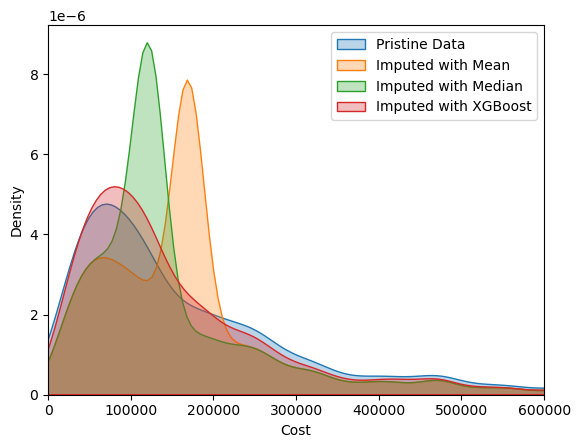

In [16]:
sns.kdeplot(pristine_cost, bw_adjust=0.8, label='Pristine Data', fill=True, alpha=0.3)
sns.kdeplot(data=X_mean_imputed, x="Cost", bw_adjust=0.8, label='Imputed with Mean', fill=True, alpha=0.3)
sns.kdeplot(data=X_median_imputed, x="Cost", bw_adjust=0.8, label='Imputed with Median', fill=True, alpha=0.3)
sns.kdeplot(data=X_xgboost_imputed, x="Cost", bw_adjust=0.8, label='Imputed with XGBoost', fill=True, alpha=0.3)
plt.xlabel('Cost')
plt.legend()
plt.xlim(0,600000)